In [55]:
import pickle
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [23]:
with open('train_features1.pkl',mode='rb')as file:
    train_features1=pickle.load(file)
with open('train_labels.pkl',mode='rb')as file:
    train_labels=pickle.load(file)
with open('test_features1.pkl',mode='rb')as file:
    test_features1=pickle.load(file)
with open('test_labels.pkl',mode='rb')as file:
    test_labels=pickle.load(file)
with open('dataframe.pkl',mode='rb')as file:
    df=pickle.load(file)

In [24]:
knn =KNeighborsClassifier()

print('Parameters currently in use:\n')
pprint(knn.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [9]:
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(train_features1, train_labels)
print('FINISHED--------------------')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
FINISHED--------------------


In [10]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 11}

The mean accuracy of a model with these hyperparameters is:
0.9461333333333334


In [11]:
n_neighbors = list(range(3,18))
param_grid = {'n_neighbors': n_neighbors}

knnc = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(train_features1, train_labels)
print('FINISHED--------------------')

Fitting 3 folds for each of 15 candidates, totalling 45 fits
FINISHED--------------------


In [12]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 10}

The mean accuracy of a model with these hyperparameters is:
0.9461333333333334


In [13]:
best_knnc = grid_search.best_estimator_
best_knnc

KNeighborsClassifier(n_neighbors=10)

In [15]:
best_knnc.fit(train_features1, train_labels)
knnc_pred = best_knnc.predict(test_features1)

In [16]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(train_labels, best_knnc.predict(train_features1)))

The training accuracy is: 
0.9539925965097832


In [17]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(test_labels, knnc_pred))

The test accuracy is: 
0.9281437125748503


In [58]:
# Classification report
print("Classification report for KNN model")
print(classification_report(test_labels,knnc_pred))

Classification report for KNN model
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.92      0.92      0.92        49
           2       0.89      0.93      0.91        60
           3       0.89      0.93      0.91        81
           4       0.96      0.90      0.93        72

    accuracy                           0.93       334
   macro avg       0.93      0.93      0.93       334
weighted avg       0.93      0.93      0.93       334



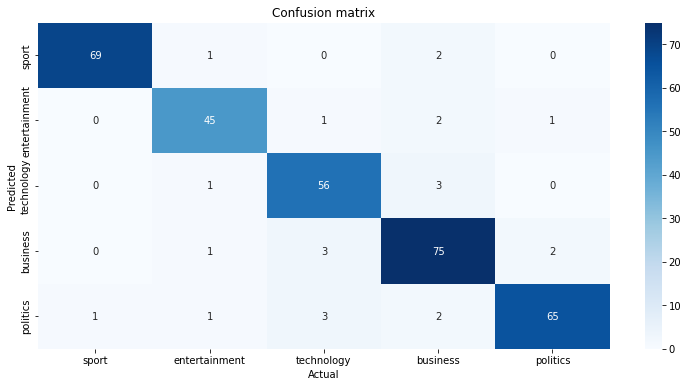

In [57]:
aux_df = df[['Category', 'CategoryID']].drop_duplicates().sort_values('CategoryID')
conf_matrix = confusion_matrix(test_labels, knnc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.savefig('KNN1_confusion.png',bbox_inches = "tight")

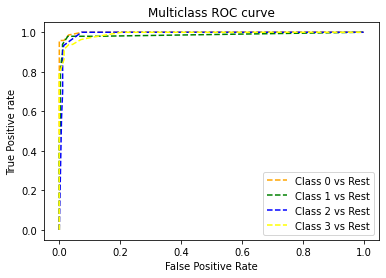

In [53]:
fpr = {}
tpr = {}
thresh ={}
y_prob_pred_cnb = best_knnc.predict_proba(test_features1)
n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_labels, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC');

In [56]:
roc_auc_score(test_labels, y_prob_pred_cnb, multi_class='ovo', average='weighted')

0.989502151215332

# Second features

In [35]:
with open('train_features2.pkl',mode='rb')as file:
    train_features2=pickle.load(file)
with open('test_features2.pkl',mode='rb')as file:
    test_features2=pickle.load(file)

In [36]:
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(train_features2, train_labels)
print('FINISHED--------------------')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
FINISHED--------------------


In [37]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 16}

The mean accuracy of a model with these hyperparameters is:
0.9504


In [38]:
n_neighbors = list(range(5,21))
param_grid = {'n_neighbors': n_neighbors}

knnc = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(train_features2, train_labels)
print('FINISHED--------------------')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
FINISHED--------------------


In [39]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 9}

The mean accuracy of a model with these hyperparameters is:
0.9530666666666666


In [40]:
best_knnc2 = grid_search.best_estimator_
best_knnc2

KNeighborsClassifier(n_neighbors=9)

In [41]:
best_knnc2.fit(train_features2, train_labels)
knnc_pred2 = best_knnc2.predict(test_features2)

In [42]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(train_labels, best_knnc2.predict(train_features2)))

The training accuracy is: 
0.9550502379693284


In [43]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(test_labels, knnc_pred2))

The test accuracy is: 
0.937125748502994


In [44]:
# Classification report
print("Classification report")
print(classification_report(test_labels,knnc_pred2))

Classification report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.94      0.92      0.93        49
           2       0.93      0.92      0.92        60
           3       0.92      0.95      0.93        81
           4       0.94      0.93      0.94        72

    accuracy                           0.94       334
   macro avg       0.94      0.93      0.94       334
weighted avg       0.94      0.94      0.94       334



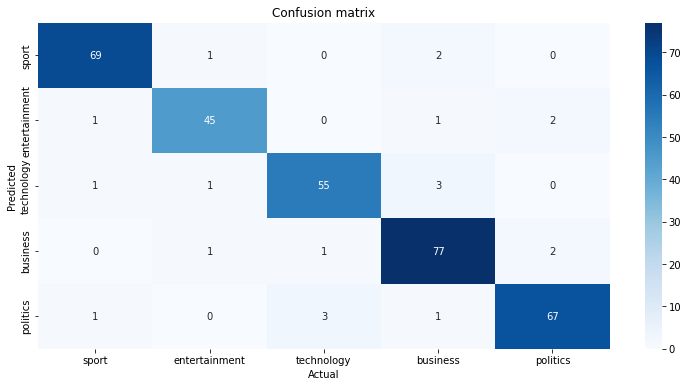

In [45]:
aux_df = df[['Category', 'CategoryID']].drop_duplicates().sort_values('CategoryID')
conf_matrix = confusion_matrix(test_labels, knnc_pred2)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

# base models

In [46]:
base_model = KNeighborsClassifier()
base_model.fit(train_features1, train_labels)
accuracy_score(test_labels, base_model.predict(test_features1))

0.9251497005988024

In [47]:
best_knnc.fit(train_features1, train_labels)
accuracy_score(test_labels, best_knnc.predict(test_features1))

0.9281437125748503

In [48]:
base_model2 = KNeighborsClassifier()
base_model2.fit(train_features2, train_labels)
accuracy_score(test_labels, base_model2.predict(test_features2))

0.9341317365269461

In [49]:
best_knnc2.fit(train_features2, train_labels)
accuracy_score(test_labels, best_knnc2.predict(test_features2))

0.937125748502994

In [50]:
d = {
     'Model': ['KNN1','KNN2'],
     'Training Set Accuracy': [accuracy_score(train_labels, best_knnc.predict(train_features1)),accuracy_score(train_labels,
                                                            best_knnc2.predict(train_features2))],
     'Test Set Accuracy': [accuracy_score(test_labels, knnc_pred),accuracy_score(test_labels, knnc_pred2)]
}

df_models_knnc = pd.DataFrame(d)
df_models_knnc

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN1,0.953993,0.928144
1,KNN2,0.955050,0.937126


In [59]:
df_models_knnc.to_pickle('KNN.accuracy.pkl')